<a href="https://colab.research.google.com/github/Siddhi124github/data-science-prac-1-and-2/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SHETH L.U.J & SIR M.V COLLEGE**

PRACTICAL 4

T096 SIDDHI NAIK

In [2]:
import pandas as pd

df = pd.read_csv("data.csv")
print("Dataset loaded.")
df.head()


Dataset loaded.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Clean: Drop id + unnamed columns

In [3]:
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")], errors="ignore")
df = df.drop(columns=["id"], errors="ignore")
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


ncode diagnosis (M=1, B=0)

In [4]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check & Fix Missing Values

In [5]:
from sklearn.impute import SimpleImputer

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

print("Missing values handled.")


Missing values handled.


Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (455, 30)
Test: (114, 30)


Train Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model trained.")


Model trained.


Training & Testing Accuracy

In [8]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 1.0
Testing Accuracy: 0.9298245614035088


Visualize Decision Tree

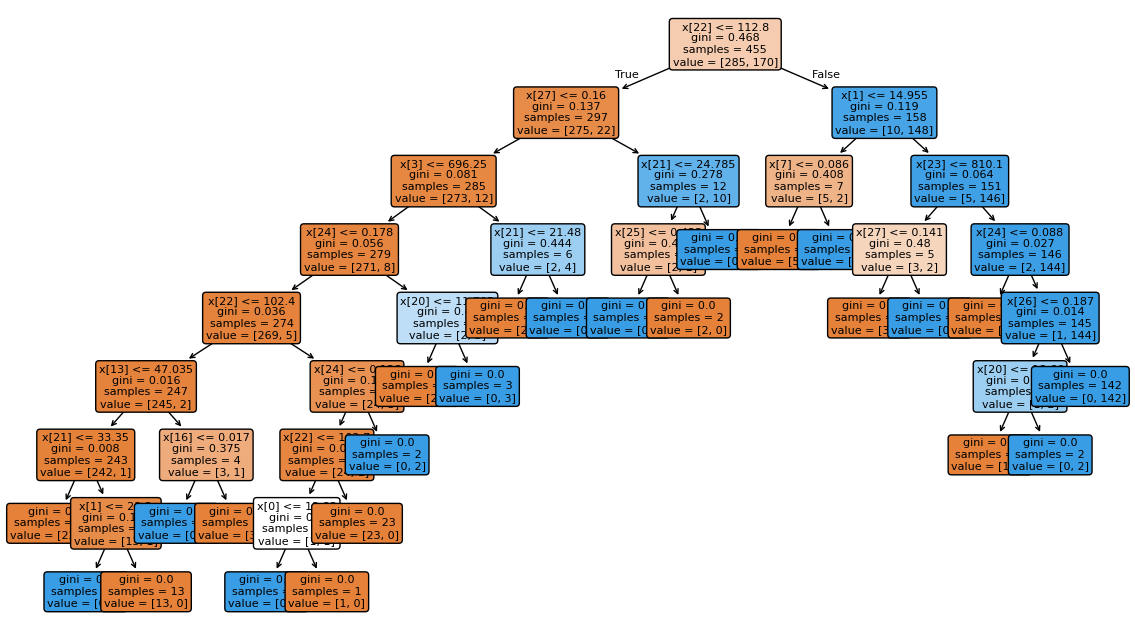

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(14,8))
plot_tree(model, filled=True, rounded=True, fontsize=8)
plt.show()


Evaluation (Confusion Matrix + Report)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, model.predict(X_test)))

print("\nClassification Report:")
print(classification_report(y_test, model.predict(X_test)))


Confusion Matrix:
[[68  4]
 [ 4 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



FPR & TPR Values

In [11]:
from sklearn.metrics import roc_curve

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print("FPR sample:", fpr[:5])
print("TPR sample:", tpr[:5])


FPR sample: [0.         0.05555556 1.        ]
TPR sample: [0.        0.9047619 1.       ]


ROC Curve

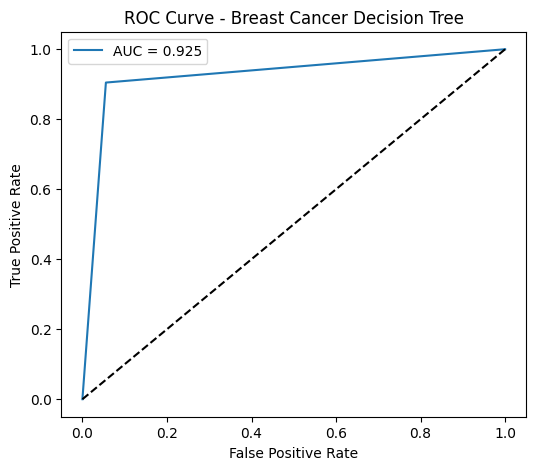

In [12]:
from sklearn.metrics import auc

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='AUC = %.3f' % auc(fpr,tpr))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Breast Cancer Decision Tree")
plt.legend()
plt.show()


Pruning: Cost-Complexity Path (alpha vs impurity)

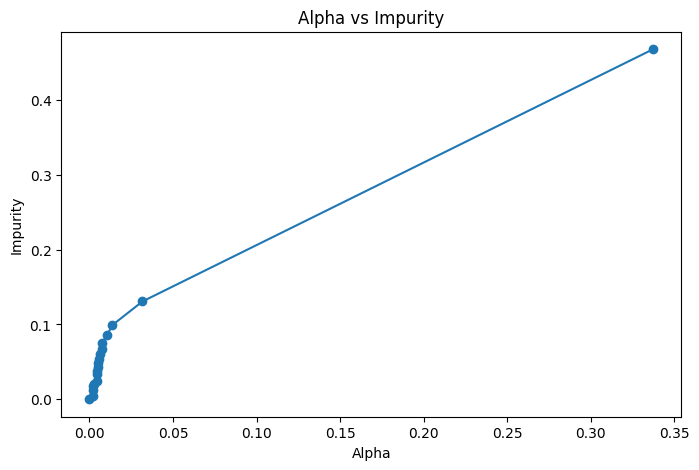

In [13]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, impurities, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Impurity")
plt.title("Alpha vs Impurity")
plt.show()


Train Models for Each Alpha & Find Best

In [14]:
from sklearn.metrics import accuracy_score

accs = []
models = []

for a in ccp_alphas:
    m = DecisionTreeClassifier(ccp_alpha=a, random_state=42)
    m.fit(X_train, y_train)
    accs.append(accuracy_score(y_test, m.predict(X_test)))
    models.append(m)

best_index = accs.index(max(accs))
best_alpha = ccp_alphas[best_index]
best_alpha


np.float64(0.0021800062285892226)

Retrain with Best Alpha

In [15]:
pruned = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
pruned.fit(X_train, y_train)

print("Pruned Train Acc:", accuracy_score(y_train, pruned.predict(X_train)))
print("Pruned Test Acc:", accuracy_score(y_test, pruned.predict(X_test)))


Pruned Train Acc: 0.9934065934065934
Pruned Test Acc: 0.9473684210526315


Visualize Pruned Tree

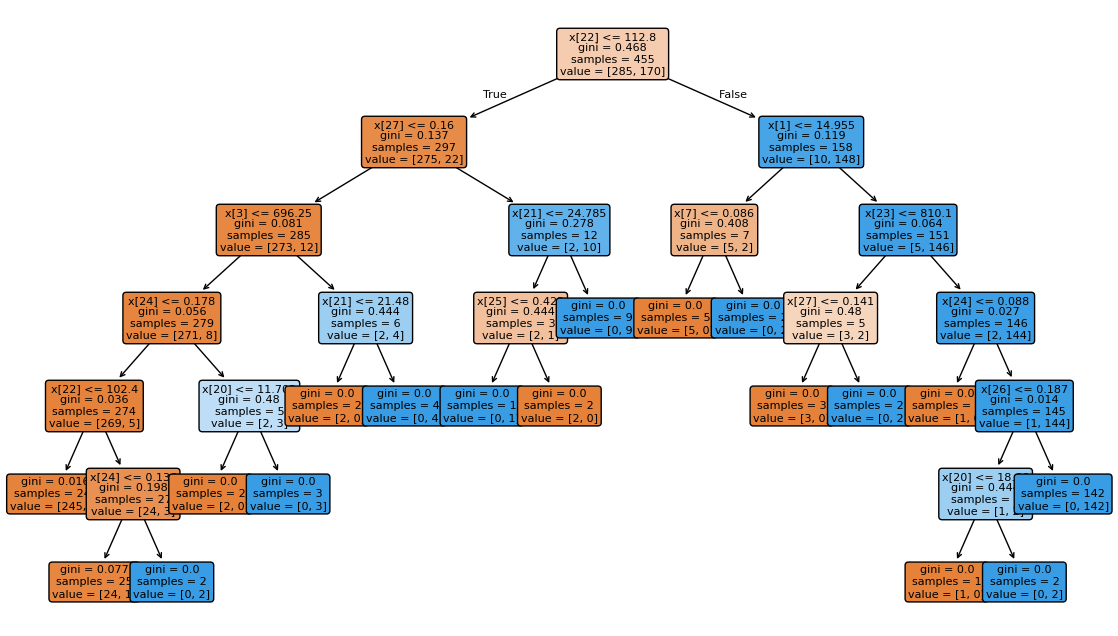

In [16]:
plt.figure(figsize=(14,8))
plot_tree(pruned, filled=True, rounded=True, fontsize=8)
plt.show()
